#### Explore effect of industry on percent poverty

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
feat = pd.read_pickle('features.pkl')

In [3]:
feat.columns

Index(['FIPS', 'CountyName', 'PercBelowPov', 'perc_in_labor_frc',
       'perc_in_armfrc', 'p_com_alone', 'p_com_carpool', 'p_com_pubtrans',
       'p_com_walk', 'p_com_other', 'p_com_workhome', 'perc_occ_mgt',
       'perc_occ_svc', 'perc_occ_sell', 'perc_occ_constr', 'perc_occ_matl',
       'p_ind_ag', 'p_ind_constr', 'p_ind_manu', 'p_ind_whlesl', 'p_ind_ret',
       'p_ind_trans', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste', 'p_ind_edsvc',
       'p_ind_tour', 'p_ind_othsvc', 'p_ind_pubadm', 'pov_bins', 'density_pop',
       'density_house', 'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 'fert_age20_34', 'fert_age35_50',
       'p_highsch', 'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864',
       'p_civdis_65', 'p_samehouse', 'p_diffhousUS', 'p_abroad1yr',
       'p_nativeUS', 'p_nativestate', 'p_nat_citz', 'p_spk_engl'],
      dtype='object')

In [4]:
total_ind = []
for i in range(len(feat)):
    t_ind = sum(feat.loc[i,'p_ind_ag':'p_ind_pubadm'])
    total_ind.append(t_ind)            

print(np.mean(total_ind))    
print(np.std(total_ind))  

100.000413749
0.103947334824


In [5]:
feat[['p_ind_ag', 'p_ind_constr', 'p_ind_manu', 'p_ind_whlesl', 'p_ind_ret',
       'p_ind_trans', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste', 'p_ind_edsvc',
       'p_ind_tour', 'p_ind_othsvc', 'p_ind_pubadm']].describe()

,p_ind_ag,p_ind_constr,p_ind_manu,p_ind_whlesl,p_ind_ret,p_ind_trans,p_ind_info,p_ind_FIRE,p_ind_waste,p_ind_edsvc,p_ind_tour,p_ind_othsvc,p_ind_pubadm
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,6.973202,7.122342,12.097454,2.386219,11.433068,5.441375,1.429726,4.613908,6.653342,23.172406,8.126162,4.724411,5.826798
std,7.443745,2.276303,7.088659,1.177624,2.431517,2.097466,0.825409,1.920482,3.198901,4.635439,3.651182,1.258939,3.344986
min,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.000000,1.000000
25%,1.900000,5.600000,6.625000,1.700000,10.100000,4.100000,0.900000,3.400000,4.600000,20.200000,5.900000,4.000000,3.700000
50%,4.300000,6.800000,11.250000,2.300000,11.500000,5.100000,1.300000,4.300000,6.100000,22.900000,7.700000,4.700000,4.900000
75%,9.300000,8.300000,16.600000,3.000000,12.900000,6.400000,1.800000,5.500000,8.100000,25.700000,9.500000,5.400000,6.900000
max,49.900000,23.200000,71.800000,16.400000,30.500000,25.200000,13.300000,22.200000,57.300000,47.500000,40.900000,15.800000,32.400000


In [10]:
industries = feat[['pov_bins','p_ind_ag', 'p_ind_constr', 'p_ind_manu', 'p_ind_whlesl', 'p_ind_ret',
       'p_ind_trans', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste', 'p_ind_edsvc',
       'p_ind_tour', 'p_ind_othsvc', 'p_ind_pubadm','PercBelowPov']] 

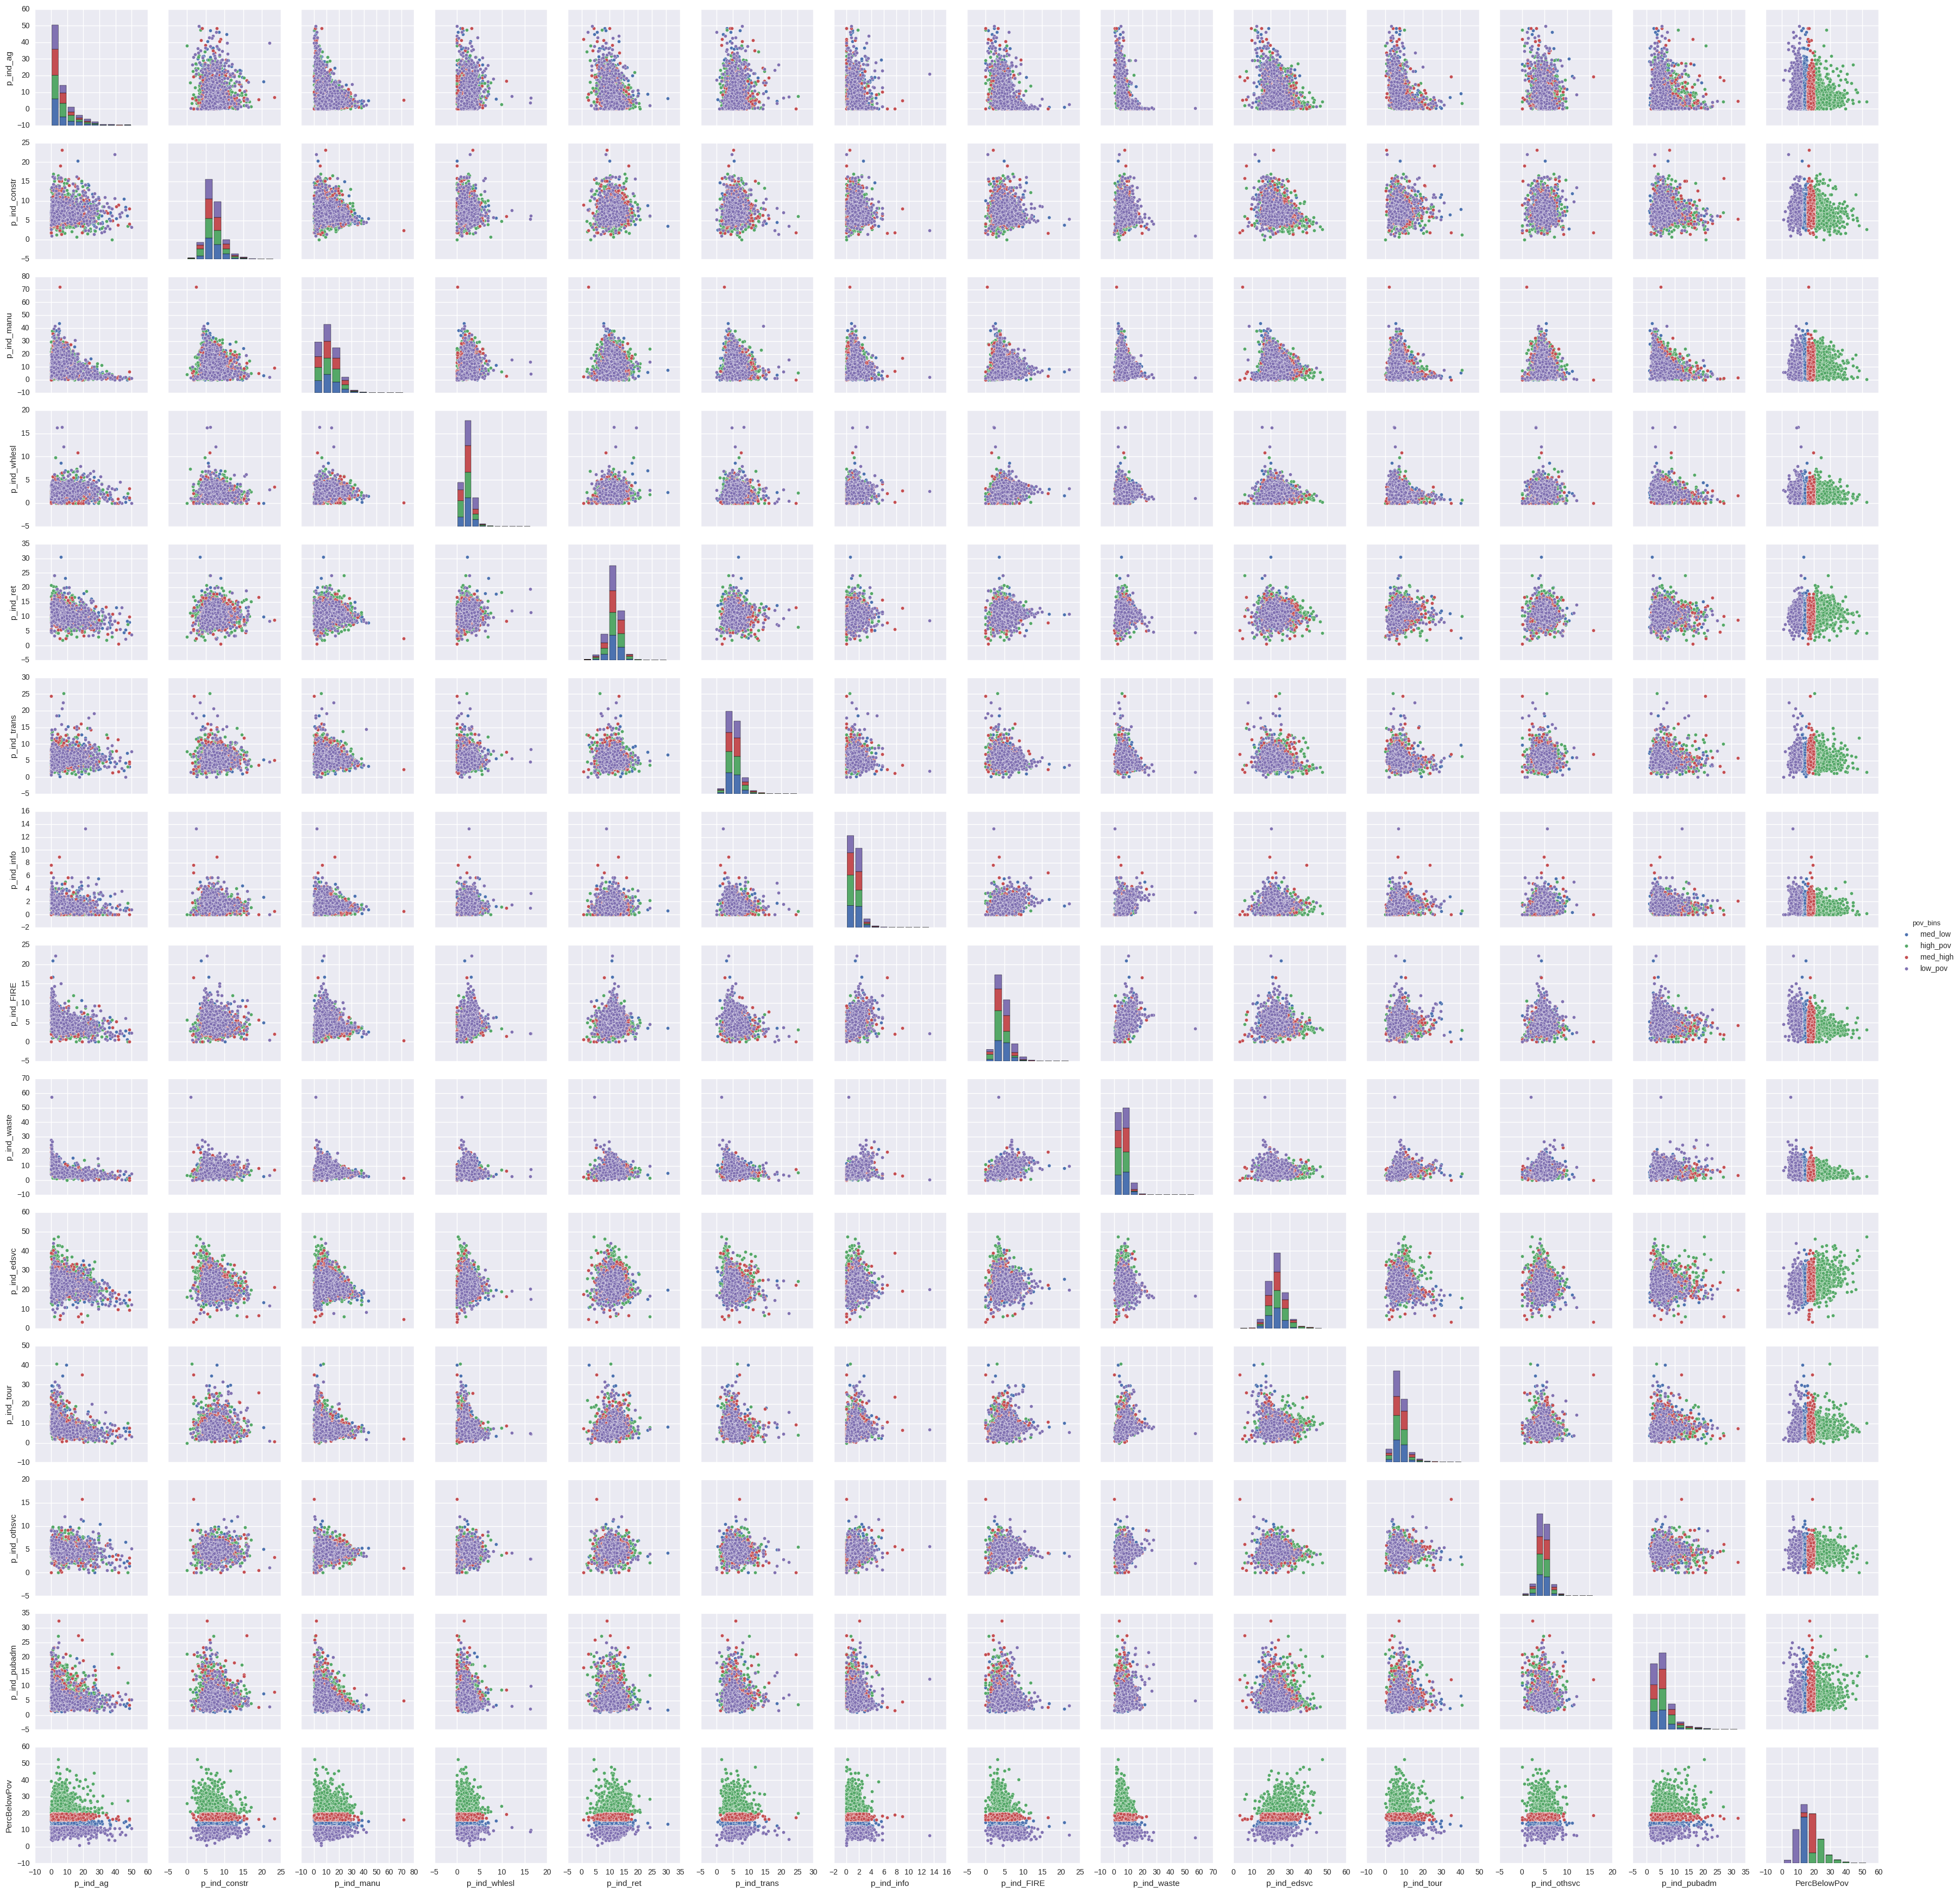

In [11]:
sb.pairplot(industries, hue="pov_bins");

In [12]:
industries.corr()

,p_ind_ag,p_ind_constr,p_ind_manu,p_ind_whlesl,p_ind_ret,p_ind_trans,p_ind_info,p_ind_FIRE,p_ind_waste,p_ind_edsvc,p_ind_tour,p_ind_othsvc,p_ind_pubadm,PercBelowPov
p_ind_ag,1.000000,0.036342,-0.361537,-0.022060,-0.357825,0.125862,-0.191583,-0.298248,-0.457664,-0.219470,-0.287089,-0.121857,0.025365,-0.035172
p_ind_constr,0.036342,1.000000,-0.148702,-0.078466,-0.033845,0.075855,-0.080532,-0.038423,-0.044892,-0.241069,-0.037330,0.061677,-0.004803,-0.088248
p_ind_manu,-0.361537,-0.148702,1.000000,0.062976,0.036555,-0.061206,-0.157085,-0.165523,-0.181910,-0.158106,-0.258798,-0.063283,-0.391099,0.030105
p_ind_whlesl,-0.022060,-0.078466,0.062976,1.000000,0.096116,0.015091,0.077173,0.166385,0.038895,-0.096819,-0.226088,0.034064,-0.246332,-0.189129
p_ind_ret,-0.357825,-0.033845,0.036555,0.096116,1.000000,-0.066796,0.034596,0.062581,0.072410,-0.031403,0.064925,0.073233,-0.146459,0.068428
p_ind_trans,0.125862,0.075855,-0.061206,0.015091,-0.066796,1.000000,-0.097595,-0.161042,-0.205693,-0.210654,-0.194379,-0.024072,0.039867,0.006172
p_ind_info,-0.191583,-0.080532,-0.157085,0.077173,0.034596,-0.097595,1.000000,0.290099,0.339807,0.018821,0.088072,0.074572,-0.065258,-0.225817
p_ind_FIRE,-0.298248,-0.038423,-0.165523,0.166385,0.062581,-0.161042,0.290099,1.000000,0.453932,-0.038088,0.112275,0.043842,-0.128723,-0.319710
p_ind_waste,-0.457664,-0.044892,-0.181910,0.038895,0.072410,-0.205693,0.339807,0.453932,1.000000,-0.085415,0.246029,0.082334,0.015915,-0.252558
p_ind_edsvc,-0.219470,-0.241069,-0.158106,-0.096819,-0.031403,-0.210654,0.018821,-0.038088,-0.085415,1.000000,-0.070029,-0.085378,-0.001695,0.272012


In [7]:
from pylab import *

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap=cm.PRGn, interpolation='none')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

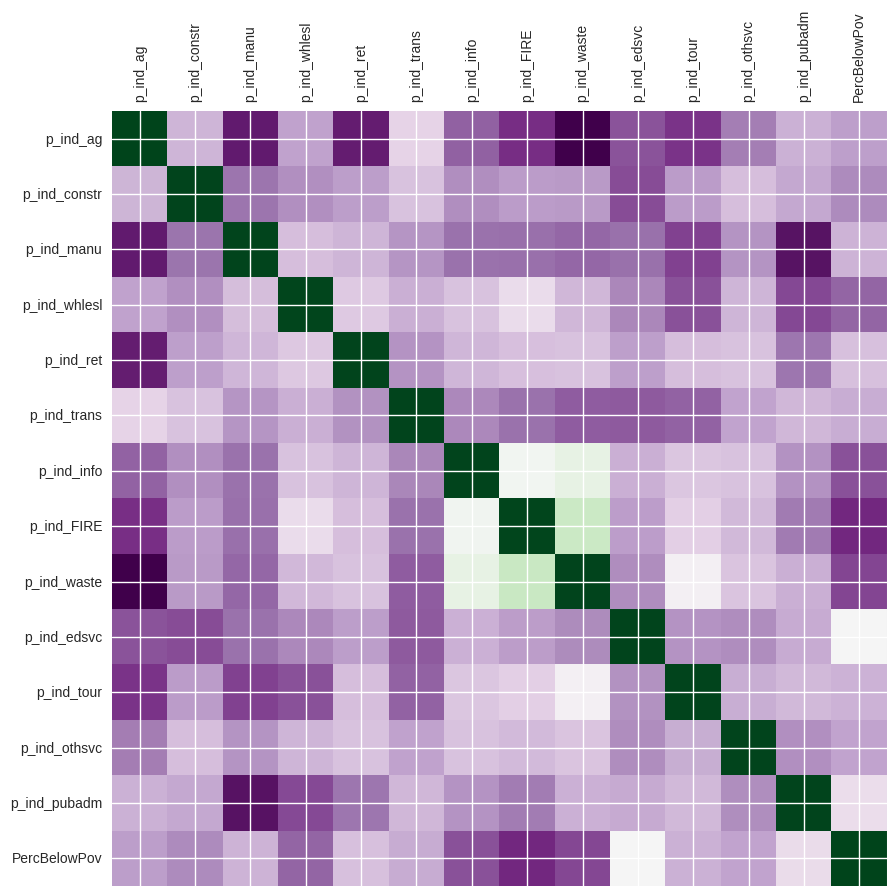

In [13]:
plot_corr(industries)

In [15]:
df2 = industries[['PercBelowPov','p_ind_whlesl','p_ind_FIRE','p_ind_waste','p_ind_edsvc','p_ind_pubadm']]

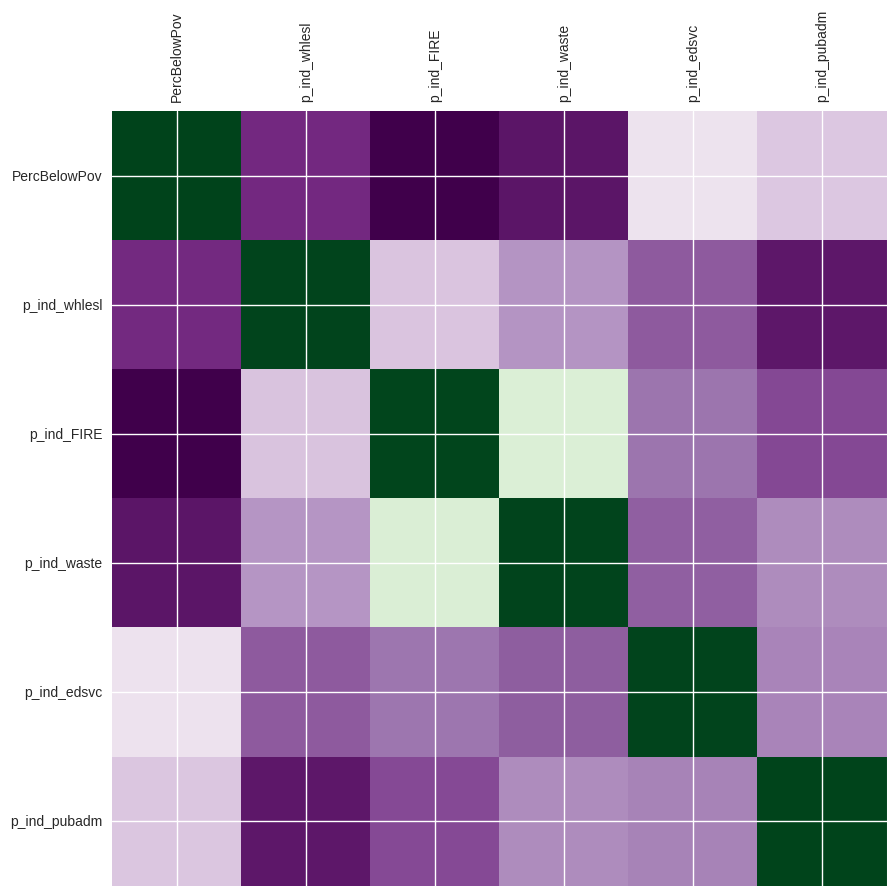

In [17]:
plot_corr(df2)

In [18]:
df2.corr()

,PercBelowPov,p_ind_whlesl,p_ind_FIRE,p_ind_waste,p_ind_edsvc,p_ind_pubadm
PercBelowPov,1.000000,-0.189129,-0.319710,-0.252558,0.272012,0.172465
p_ind_whlesl,-0.189129,1.000000,0.166385,0.038895,-0.096819,-0.246332
p_ind_FIRE,-0.319710,0.166385,1.000000,0.453932,-0.038088,-0.128723
p_ind_waste,-0.252558,0.038895,0.453932,1.000000,-0.085415,0.015915
p_ind_edsvc,0.272012,-0.096819,-0.038088,-0.085415,1.000000,-0.001695
p_ind_pubadm,0.172465,-0.246332,-0.128723,0.015915,-0.001695,1.000000


In [11]:
y = feat['PercBelowPov']/100

X = feat[[
       'p_ind_ag', 'p_ind_constr', 'p_ind_manu', 'p_ind_whlesl', 'p_ind_ret',
       'p_ind_trans', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste', 'p_ind_edsvc',
       'p_ind_tour', 'p_ind_othsvc', 'p_ind_pubadm'
          ]]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

Optimization terminated successfully.
         Current function value: 0.295728
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           PercBelowPov   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2185
Method:                           MLE   Df Model:                           13
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:                0.006641
Time:                        17:42:43   Log-Likelihood:                -650.30
converged:                       True   LL-Null:                       -654.65
                                        LLR p-value:                    0.7955
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.2911     55.380     -0.005      0.996      -108.833   108.251
p_ind_ag        -0.0229